In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
breastcancer = pd.read_csv('data.csv')

#breastcancer

In [ ]:
diagnosis = breastcancer['diagnosis'].tolist()
Diagnosislist = []
for x in diagnosis:
    if x in ('M'):
        #print('sports')
        Diagnosislist.append(int(0))
    else:
        Diagnosislist.append(int(1))

Diagnosislist

Categories = pd.Series(Diagnosislist)
breastcancer['Diagnosis'] = Categories.values
breastcancer.drop(['diagnosis'], axis = 1, inplace = True)

#drop id column 
breastcancer.drop(['id'], axis = 1, inplace = True)
breastcancer_list = list(breastcancer.values)
breastcancer_list = np.vstack(breastcancer_list)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = breastcancer_list[:, :-1]
y = breastcancer_list[:,-1]

In [ ]:
pca = PCA(n_components=2)
reduced_breastcancer = pca.fit_transform(X)
reduced_breastcancer

array([[ 1160.1425737 ,  -293.91754364],
       [ 1269.12244319,    15.63018184],
       [  995.79388896,    39.15674324],
       ..., 
       [  314.50175618,    47.55352518],
       [ 1124.85811531,    34.12922497],
       [ -771.52762188,   -88.64310636]])

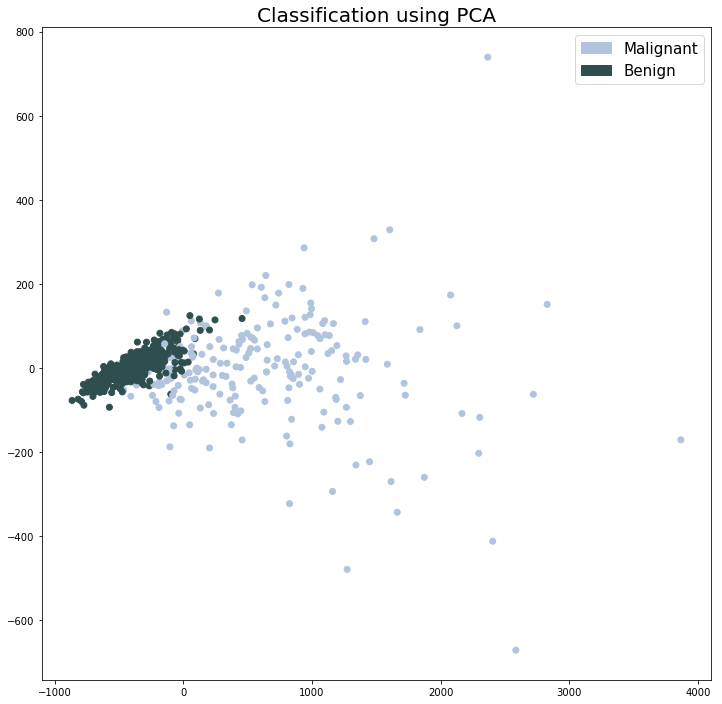

In [ ]:
colors = list()
palette = {0: "lightsteelblue", 1: "darkslategrey"}
for c in y: 
    colors.append(palette[int(c)])
    
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='lightsteelblue', label='Malignant')
blue_patch = mpatches.Patch(color='darkslategrey', label='Benign')

plt.figure(figsize=(12, 12))
plt.scatter(reduced_breastcancer[:,0], reduced_breastcancer[:,1], c=colors)
plt.legend(handles=[red_patch, blue_patch],loc=1, prop={'size': 15})
plt.title("Classification using PCA", size = 20)
plt.show()

In [ ]:
colors.count('lightsteelblue')
#M

212

In [ ]:
tsne = TSNE(n_components=2,
            init="pca")
reduced_breastcancer_tsne = tsne.fit_transform(X)

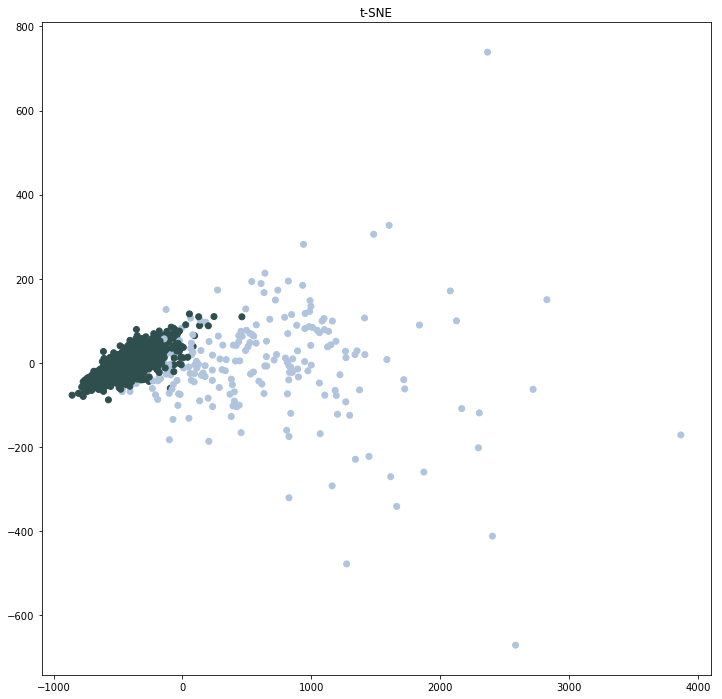

In [ ]:
#t-Distributed Stochastic Neighbor Embedding 
plt.figure(figsize=(12, 12))
plt.scatter(reduced_breastcancer_tsne[:,0], reduced_breastcancer_tsne[:,1], c=colors)
plt.title("t-SNE")
plt.show()

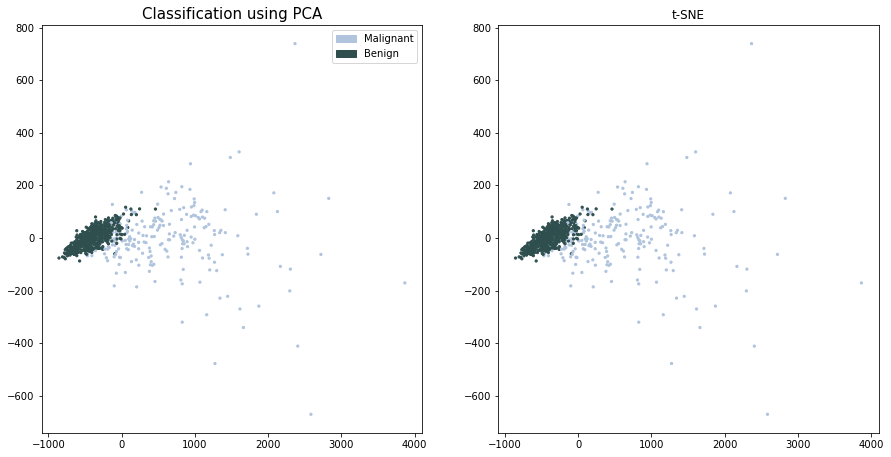

In [ ]:
plt.figure(1)  
plt.figure(figsize=(15,7.5))
#plt.suptitle('bold figure suptitle', fontsize=14)

plt.subplot(121) 
plt.scatter(reduced_breastcancer[:,0], reduced_breastcancer[:,1], c=colors, s=5)
plt.legend(handles=[red_patch, blue_patch],loc=1, prop={'size': 10})
plt.title("Classification using PCA", size = 15)

plt.subplot(122) 
plt.scatter(reduced_breastcancer_tsne[:,0], reduced_breastcancer_tsne[:,1], c=colors, s=5)
plt.title("t-SNE")

plt.show()